<a href="https://colab.research.google.com/github/JPLAVALLEY/kaggle/blob/master/Copy_of_House_Prices_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition for House Prices: Advanced Regression Techniques

# Upload my kaggle.json API file

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jplavalley","key":"6b3c042d9370b332481115da40efebc2"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 55.7MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.8MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.6MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.8MB/s]


# Import Libraries

In [0]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# figure size in inches
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('dark_background')

# Import training data

In [150]:
df_train = pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Lets see how many nulls we have

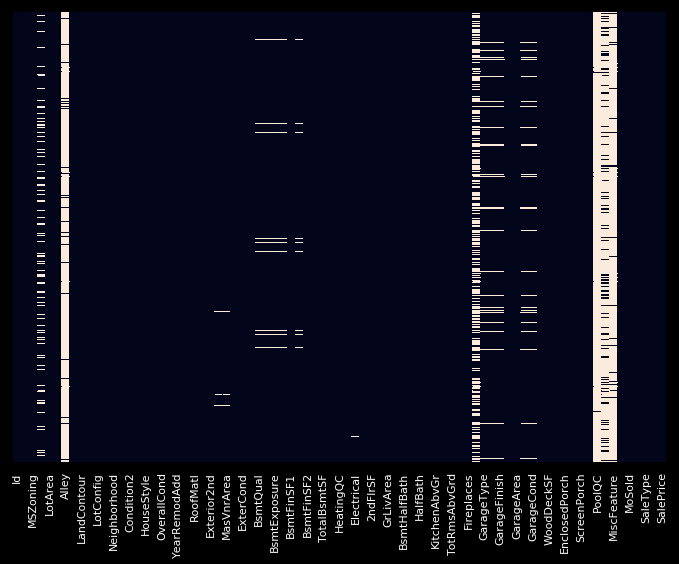

In [12]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

# We have a lot of nulls, lets clean up our data one column at a time, then we repeat this also on the test data

In [13]:
df_train.columns[df_train.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# Start off with LotFrontage

In [16]:
df_train['LotFrontage'].isnull().sum()

259

# Has 259 null rows

In [20]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [0]:
#use the average LotFrontage for null values
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

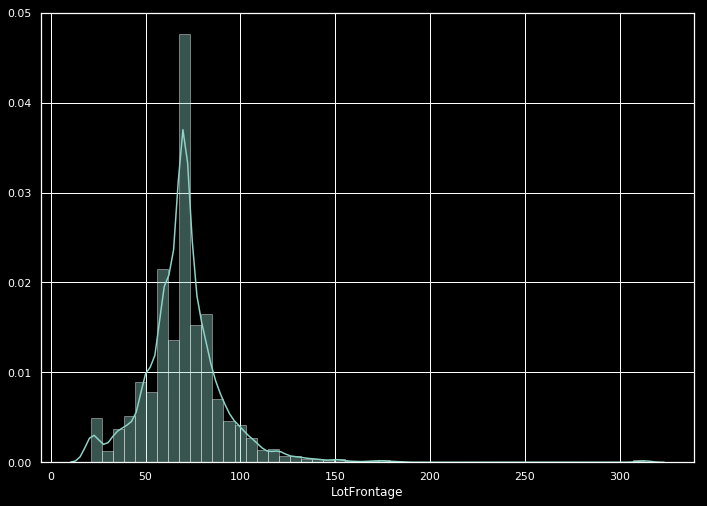

In [22]:
ax = sns.distplot(df_train['LotFrontage'])

# Next we look at Alley

In [23]:
df_train['Alley'].isnull().sum()

1369

# 1369 null rows, this is too many, lets delete this column

In [0]:
df_train.drop(['Alley'],axis=1,inplace=True)

# MaxVnrType

In [26]:
df_train['MasVnrType'].isnull().sum()

8

# 8 null rows

In [28]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [30]:
df_train['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

# Replace Null MaxVnrType with mode, in this case 'None'

In [0]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

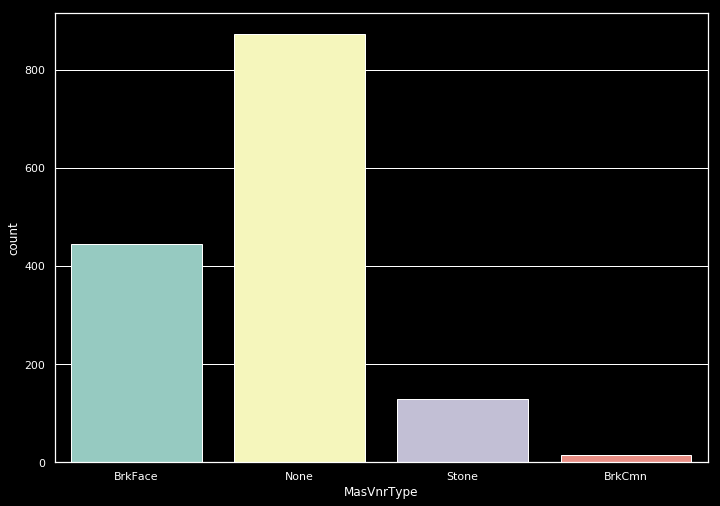

In [33]:
sns.countplot(x='MasVnrType', data=df_train)

# MasVnrArea

In [34]:
df_train['MasVnrArea'].isnull().sum()

8

In [0]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

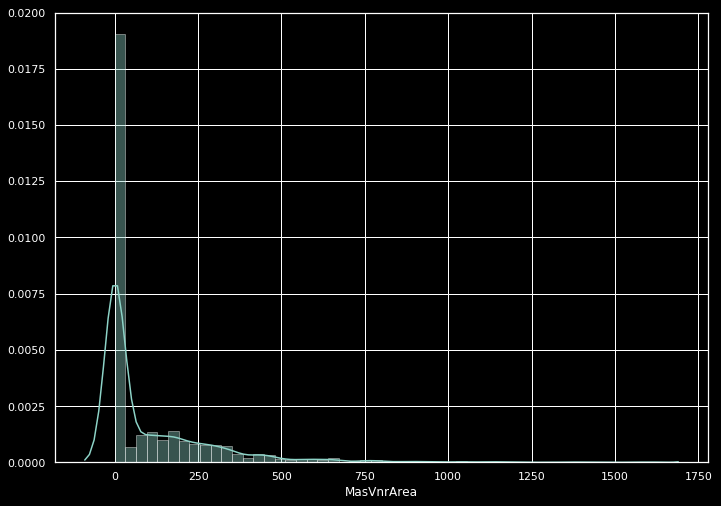

In [70]:
ax = sns.distplot(df_train['MasVnrArea'])

# BsmtQual

In [71]:
df_train['BsmtQual'].isnull().sum()

37

In [77]:
df_train['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [0]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

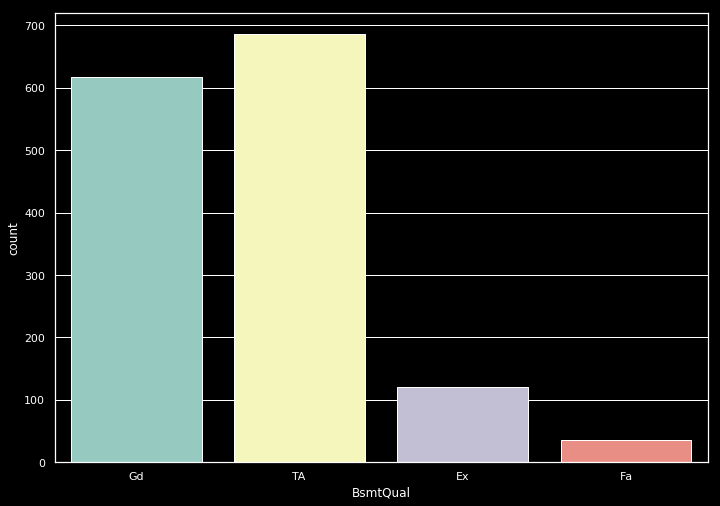

In [79]:
sns.countplot(df_train['BsmtQual'])

# BsmtCond

In [80]:
df_train['BsmtCond'].isnull().sum()

37

In [81]:
df_train['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [0]:
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])

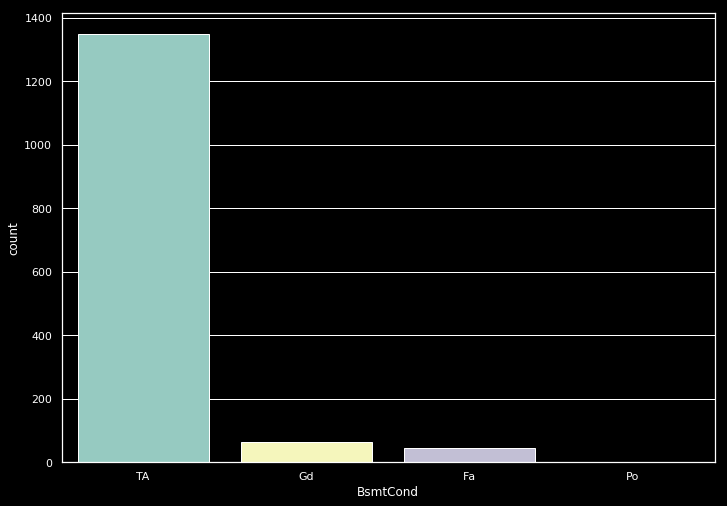

In [83]:
sns.countplot(df_train['BsmtCond'])

# BsmtExposure

In [84]:
df_train['BsmtExposure'].isnull().sum()

38

In [85]:
df_train['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [0]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])

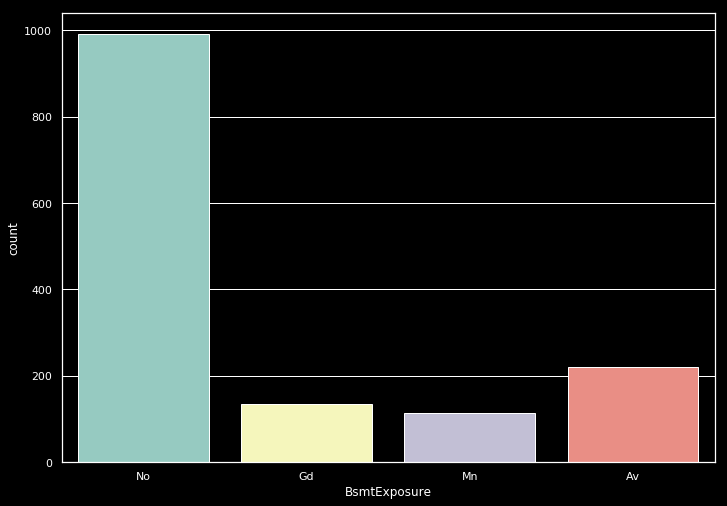

In [87]:
sns.countplot(df_train['BsmtExposure'])

# BsmtFinType1  

In [89]:
df_train['BsmtFinType1'].isnull().sum()

37

In [90]:
df_train['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [0]:
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])

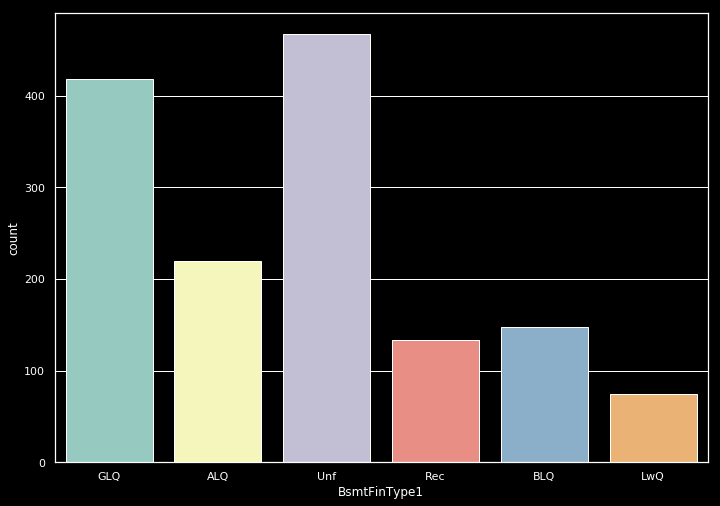

In [92]:
sns.countplot(df_train['BsmtFinType1'])

# BsmtFinType2  

In [93]:
df_train['BsmtFinType2'].isnull().sum()

38

In [94]:
df_train['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [0]:
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

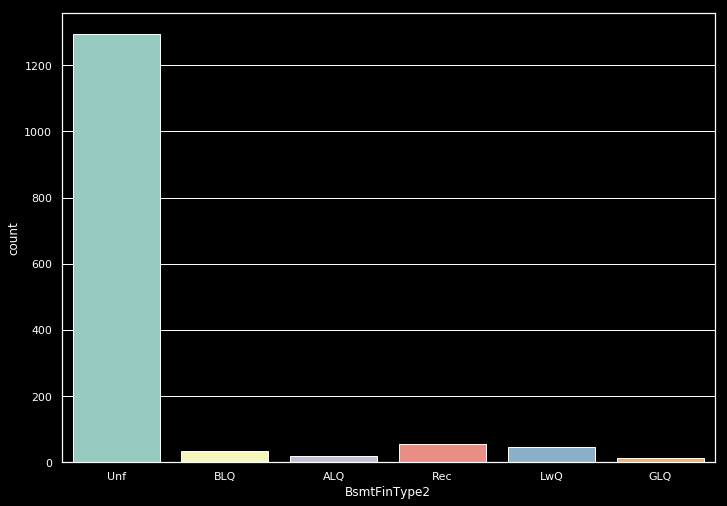

In [96]:
sns.countplot(df_train['BsmtFinType2'])

# Electrical

In [97]:
df_train['Electrical'].isnull().sum()

1

In [98]:
df_train['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [0]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

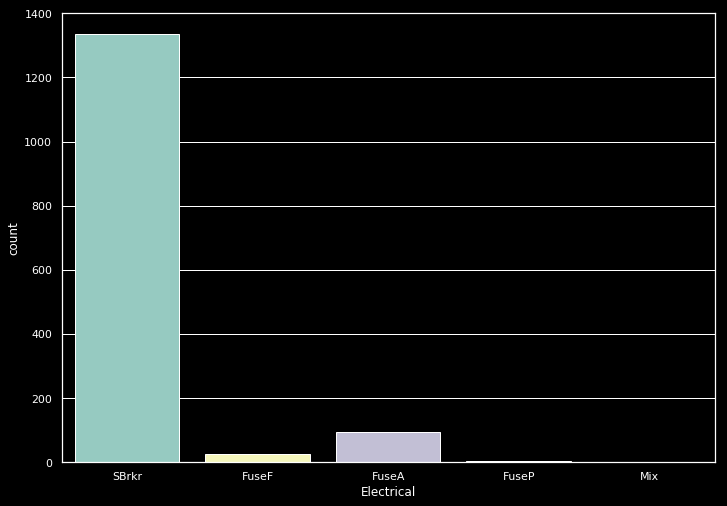

In [100]:
sns.countplot(df_train['Electrical'])

# FireplaceQu  

In [101]:
df_train['FireplaceQu'].isnull().sum()

690

In [102]:
df_train['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [0]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])

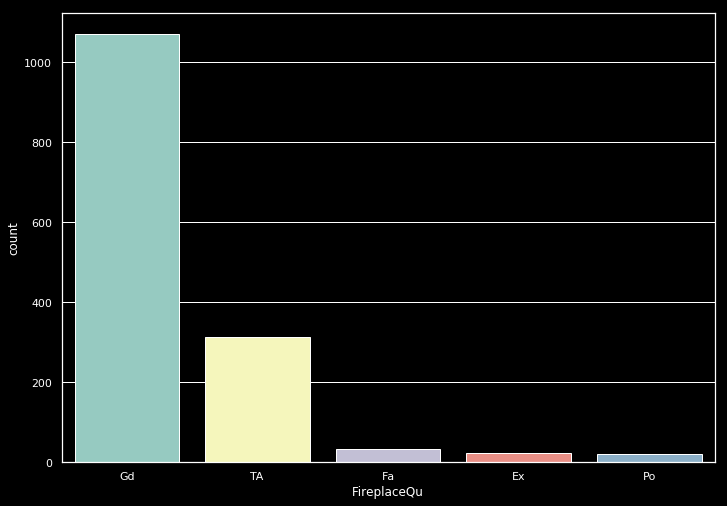

In [104]:
sns.countplot(df_train['FireplaceQu'])

# GarageType  

In [105]:
df_train['GarageType'].isnull().sum()

81

In [106]:
df_train['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [0]:
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

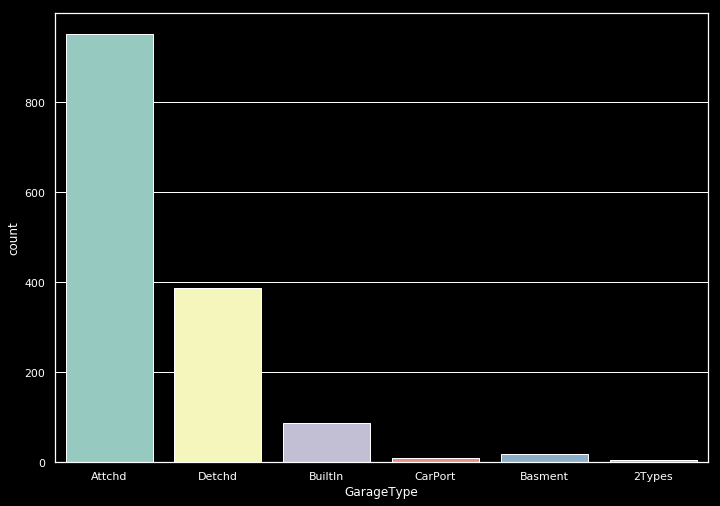

In [108]:
sns.countplot(df_train['GarageType'])

# GarageYrBlt  

In [109]:
df_train['GarageYrBlt'].isnull().sum()

81

In [110]:
df_train['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [0]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])

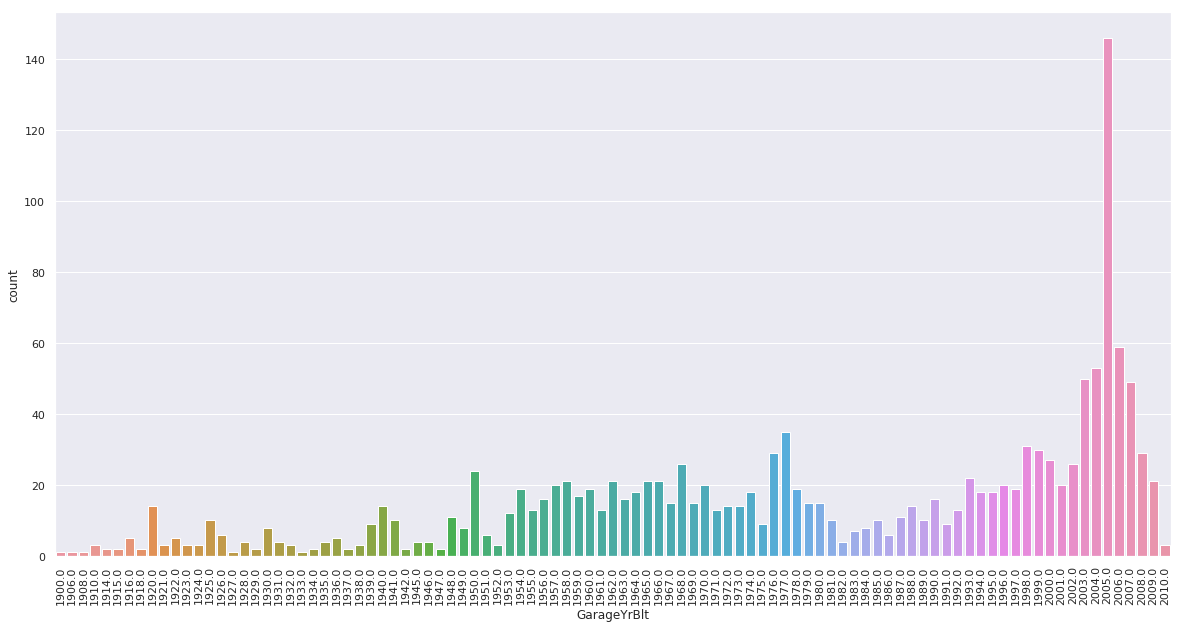

In [117]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.style.use('dark_background')

sns.countplot(df_train['GarageYrBlt'])

# GarageFinish  

In [118]:
df_train['GarageFinish'].isnull().sum()

81

In [119]:
df_train['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [0]:
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])

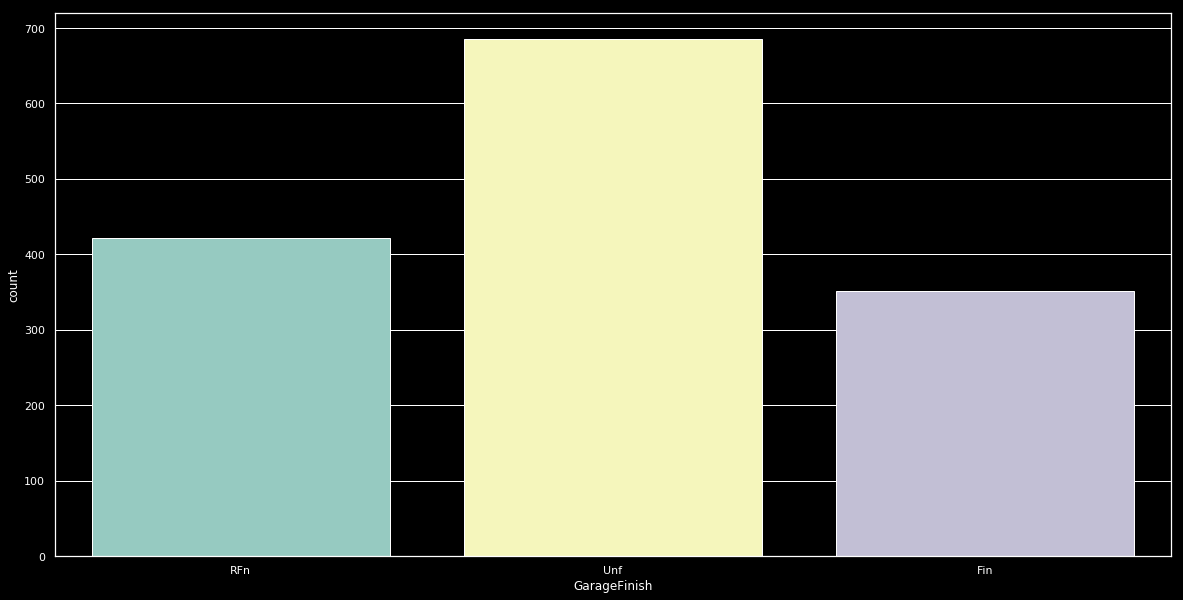

In [121]:
sns.countplot(df_train['GarageFinish'])

# GarageQual

In [123]:
df_train['GarageQual'].isnull().sum()

81

In [124]:
df_train['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [0]:
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])

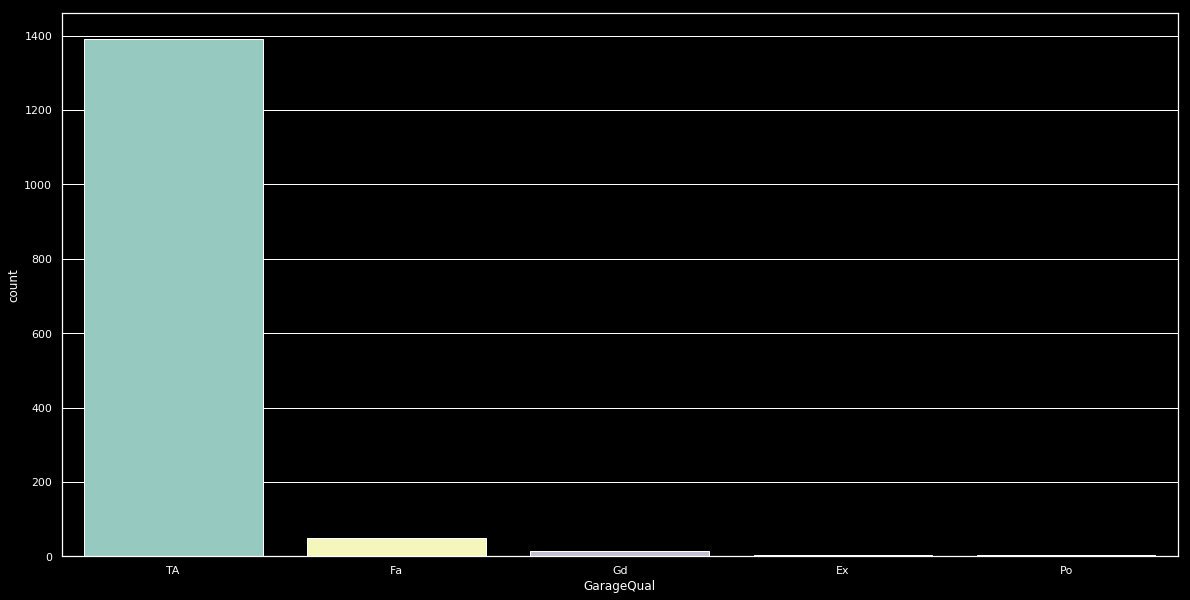

In [126]:
sns.countplot(df_train['GarageQual'])

# GarageCond  

In [127]:
df_train['GarageCond'].isnull().sum()

81

In [128]:
df_train['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [0]:
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

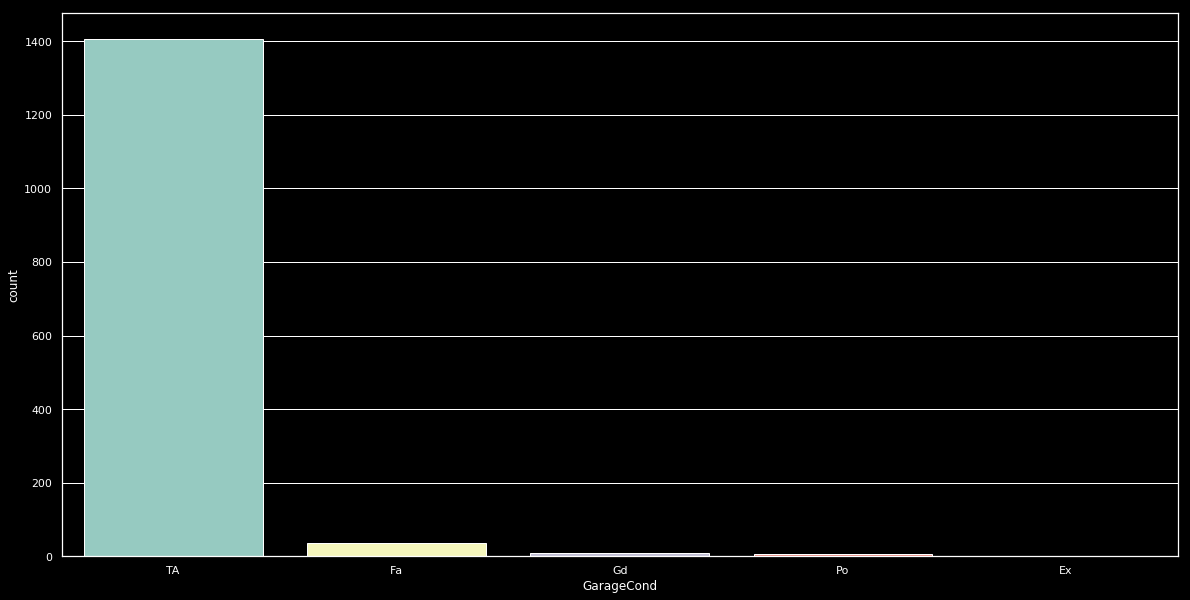

In [130]:
sns.countplot(df_train['GarageCond'])

# PoolQC  

In [131]:
df_train['PoolQC'].isnull().sum()

1453

In [132]:
df_train['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [0]:
df_train.drop(['PoolQC'],axis=1,inplace=True)

# Fence  

In [135]:
df_train['Fence'].isnull().sum()

1179

In [136]:
df_train['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [0]:
df_train.drop(['Fence'],axis=1,inplace=True)

# MiscFeature 

In [140]:
df_train['MiscFeature'].isnull().sum()

1406

In [141]:
df_train['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [0]:
df_train.drop(['MiscFeature'],axis=1,inplace=True)


# Lets create a simplified verion of the data scrub so we can use it on the test data as well

In [152]:
# gives names of columsn with null values
df_train.columns[df_train.isnull().any()].tolist()

[]

In [0]:
#Cleans our data
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train.drop(['Alley'],axis=1,inplace=True)
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train.drop(['PoolQC'],axis=1,inplace=True)
df_train.drop(['Fence'],axis=1,inplace=True)
df_train.drop(['MiscFeature'],axis=1,inplace=True)

# Data Analysis

In [0]:
from sklearn.linear_model import LinearRegression

In [156]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X = df_train[['LotArea']]
Y = df_train['SalePrice']

In [160]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
Yhat=lm.predict(X)
Yhat[0:5]

array([176580.91488881, 178995.88263327, 182460.83635359, 178890.88403568,
       188781.75192823])

In [162]:
lm.intercept_

158836.1518968766

In [163]:
lm.coef_

array([2.09997195])

In [0]:
Yhat = lm.predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
0    1460 non-null float64
dtypes: float64(1)
memory usage: 11.5 KB


# Will create submission file
pred = pd.DataFrame(Yhat)  
sub_df=pd.read_csv('train.csv')  
datasets=pd.concat([sub_df['Id'],pred],axis=1)  
datasets.columns=['Id','SalePrice']  
datasets.to_csv('submission.csv',index=False)  

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

X = df_train[['LotArea']]
Y = df_train['SalePrice']
lm.fit(X,Y)

In [0]:
Yhat=lm.predict(X)
Yhat[0:5]

In [0]:
pred = pd.DataFrame(Yhat)  
sub_df=pd.read_csv('train.csv')  
datasets=pd.concat([sub_df['Id'],pred],axis=1)  
datasets.columns=['Id','SalePrice']  
datasets.to_csv('submission.csv',index=False)  